In [146]:
# import packages
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

plt.rcParams['figure.figsize'] = (20, 8)
plt.rcParams['axes.linewidth'] = 2

plt.rc('xtick',labelsize = 20)
plt.rc('ytick',labelsize = 20)
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.labelsize'] = 30
plt.rcParams['legend.fontsize'] = 25


In [147]:
# import the data
bikes = pd.read_csv('train.csv', index_col=0, parse_dates=True)
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
datetime,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [148]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10886 entries, 2011-01-01 00:00:00 to 2012-12-19 23:00:00
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   casual      10886 non-null  int64  
 9   registered  10886 non-null  int64  
 10  count       10886 non-null  int64  
dtypes: float64(3), int64(8)
memory usage: 1020.6 KB


In [149]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['hour'] = bikes.index.hour
bikes.head(2)
#bikes['day'].unique()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1


In [150]:
bikes['week'] = bikes.index.weekday
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5


In [151]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['day'] = bikes.index.day
bikes.head(2)
#bikes['day'].unique()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,day
datetime,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1


In [152]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['month'] = bikes.index.month
bikes.head(2)
#bikes['month'].unique()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,day,month
datetime,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,1


In [153]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['year'] = bikes.index.year
bikes.head(2)
#bikes['year'].unique()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,day,month,year
datetime,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,1,2011
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,1,2011


In [154]:
# In order to include the correlations from timestamp I will introduce new columns:
bikes['month_count'] = bikes['month']+(bikes['year']-2011)*12
bikes.head(2)
#bikes['day'].unique()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,week,day,month,year,month_count
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,5,1,1,2011,1
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,5,1,1,2011,1


In [155]:
bikes.insert(16, 'count', bikes.pop('count'))
bikes.head(2)

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hour,week,day,month,year,month_count,count
datetime,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,0,5,1,1,2011,1,16
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,1,5,1,1,2011,1,40


# Explre Data Analysis

1. $\color{yellow}{\text{Check feature correlations and feature time dependence with resample to see relation per month for different years}}$

- $\color{red}{\text{Months}}$

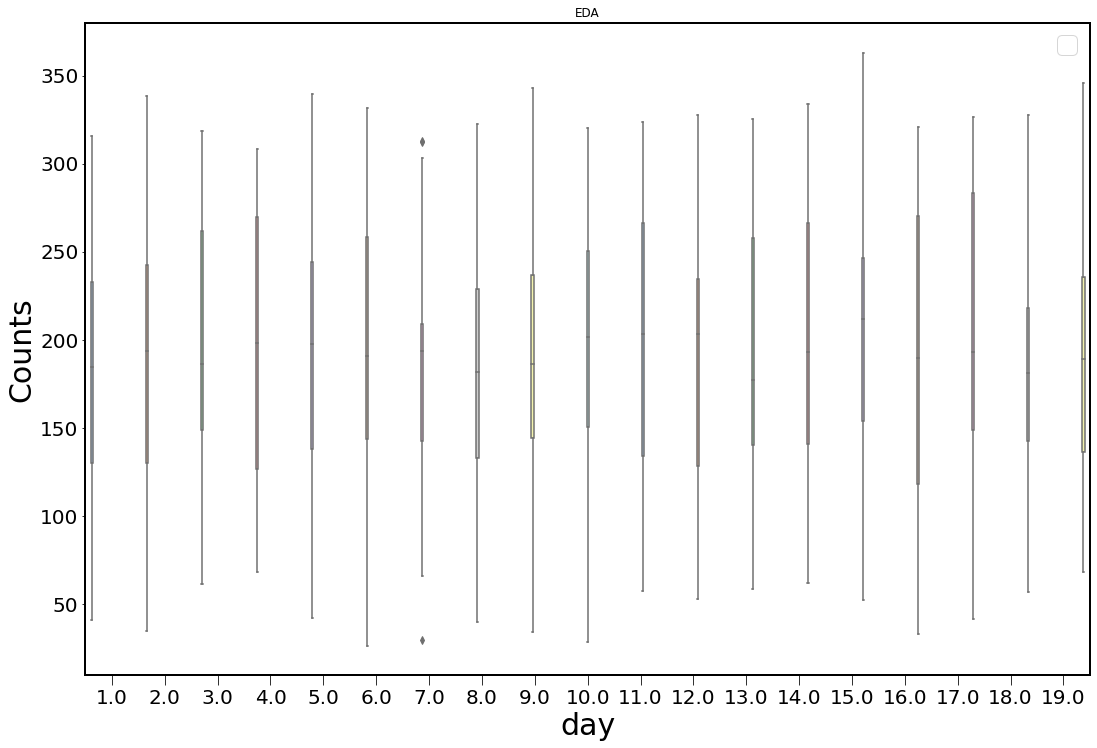

In [236]:
test = bikes.resample('d').mean()
plt.figure(figsize=(18,12))
sns.boxplot(x='day',y='count',data=test,hue='day',palette='pastel',)
plt.xlabel('day')
plt.ylabel('Counts')
plt.legend('')
plt.title('EDA')
plt.show()

- - $\color{green}{\text{Fit a Poly Regression model }}$

In [157]:
from sklearn.linear_model import Lasso 
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

In [158]:
bikes.head(1)
#X.resample('hour').mean()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,hour,week,day,month,year,month_count,count
datetime,,,,,,,,,,,,,,,,,
2011-01-01,1,0,0,1,9.84,14.395,81,0.0,3,13,0,5,1,1,2011,1,16


<AxesSubplot:xlabel='datetime', ylabel='count'>

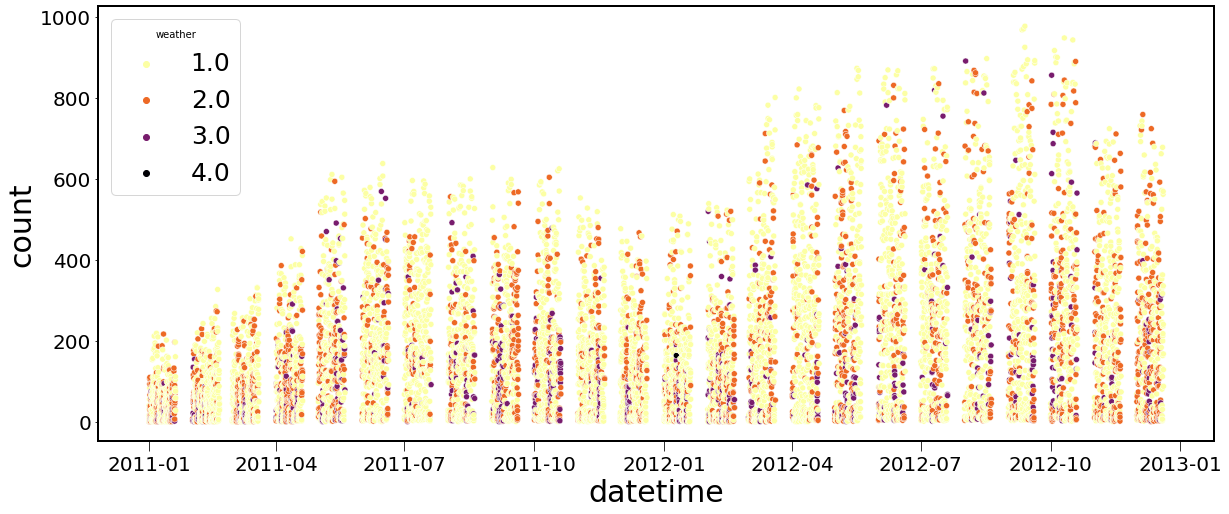

In [159]:
# check the statistsics of the different datasets
sns.scatterplot(data =bikes.resample('H').mean(), x = 'datetime', y ='count',hue='weather',palette="inferno_r")

- Group by to be able to find the degree fo polynomial

<AxesSubplot:xlabel='hour', ylabel='count'>

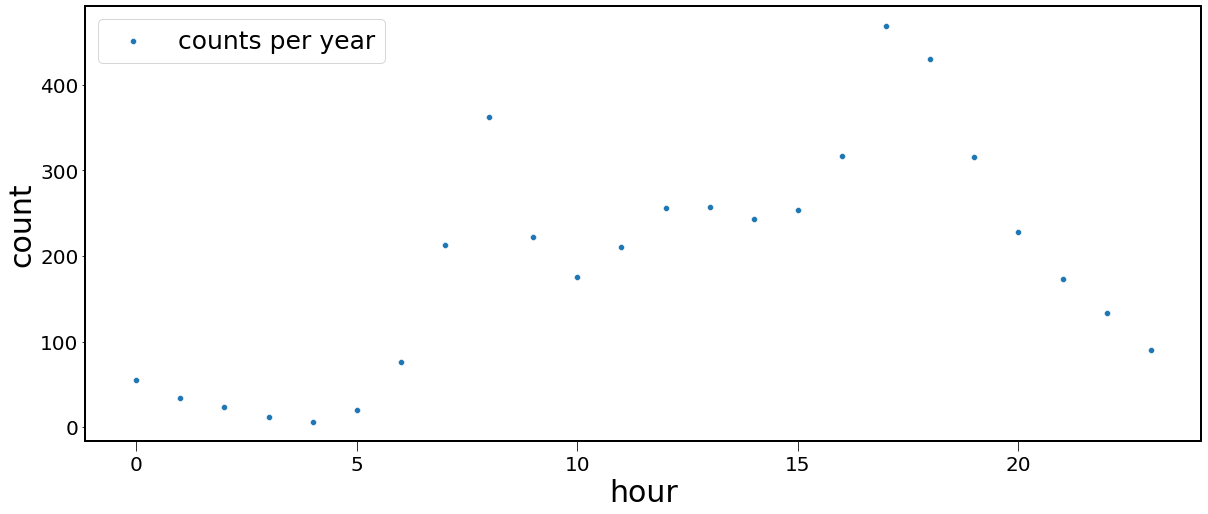

In [160]:
df = bikes.groupby('hour').mean()
sns.scatterplot(x = df.index, y = df['count'], label = 'counts per year')

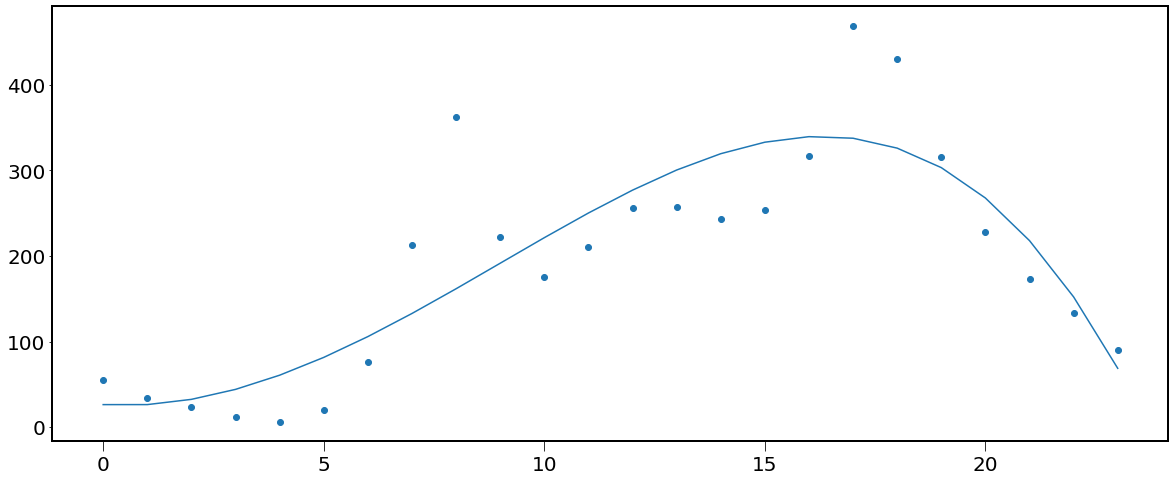

In [197]:
X = df.index
X = np.array(X).reshape(-1, 1)
y = df['count']
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X)
model = LinearRegression()
model.fit(X_poly,y)
y_pred_poly = model.predict(X_poly)
plt.scatter(X,y)
plt.plot(X,y_pred_poly)

- - Regularization

In [198]:
from sklearn.linear_model import Lasso

In [199]:
lasso = Lasso()
lasso.fit(X_poly, y)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.607e+04, tolerance: 4.084e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso()

In [200]:
y_lasso = lasso.predict(X_poly)

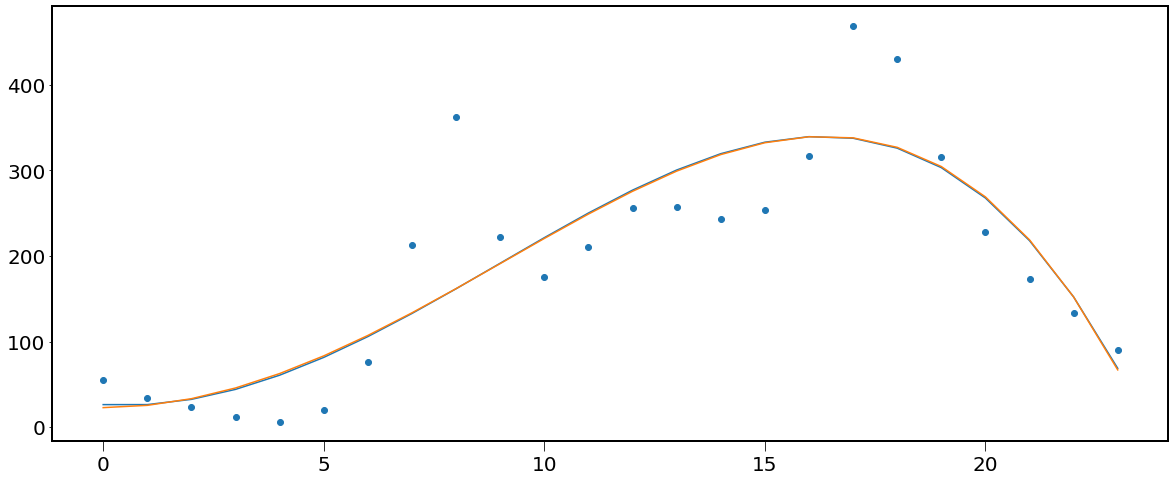

In [201]:
plt.scatter(X, y, label='actual')
plt.plot(X, y_pred_poly, label='poly')
plt.plot(X, y_lasso, label='lasso')

In [202]:
lasso.coef_

array([ 0.        , -0.        ,  2.70328744, -0.0406515 , -0.003185  ])

## Pipe it!


In [203]:
my_pipe = Pipeline([
    ['my_poly_engineering', PolynomialFeatures(degree=4)],
    ['my_lasso', Lasso(max_iter=5000)]
])

In [204]:
my_pipe.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.519e+04, tolerance: 4.084e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Pipeline(steps=[('my_poly_engineering', PolynomialFeatures(degree=4)),
                ['my_lasso', Lasso(max_iter=5000)]])

In [205]:
parameter_grid = {
    'my_poly_engineering__degree': [2,3,4,5],
    'my_lasso__alpha': [0.001, 0.01, 0.1 ]
}

In [206]:
gridsearch = GridSearchCV(my_pipe, 
                          parameter_grid, 
                          scoring=None,
                          verbose=2)

In [209]:
gridsearch.fit(X,y)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=4; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_po

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.204e+04, tolerance: 2.355e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.942e+04, tolerance: 3.348e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=5; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=4; total time=   0.0s
[CV] END my_lasso__alpha=0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.175e+04, tolerance: 2.355e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.122e+04, tolerance: 3.348e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=3; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=3; total time=   0.0s
[CV] END .my_lasso__alpha=0.

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.807e+04, tolerance: 2.355e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.793e+02, tolerance: 3.348e+01
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasin

GridSearchCV(estimator=Pipeline(steps=[('my_poly_engineering',
                                        PolynomialFeatures(degree=4)),
                                       ['my_lasso', Lasso(max_iter=5000)]]),
             param_grid={'my_lasso__alpha': [0.001, 0.01, 0.1],
                         'my_poly_engineering__degree': [2, 3, 4, 5]},
             verbose=2)

In [210]:
gridsearch.best_params_

{'my_lasso__alpha': 0.1, 'my_poly_engineering__degree': 3}

In [211]:
gridsearch.best_estimator_.score(X,y)

0.7334268232972745

In [214]:
y_pred_est = gridsearch.best_estimator_.predict(X)
y_pred_est

array([ 32.96163727,  26.91258844,  29.48623911,  39.55365305,
        55.985894  ,  77.65402573, 103.42911198, 132.18221651,
       162.78440308, 194.10673545, 225.02027735, 254.39609256,
       281.10524483, 304.01879791, 322.00781555, 333.94336152,
       338.69649956, 335.13829344, 322.1398069 , 298.5721037 ,
       263.3062476 , 215.21330235, 153.16433171,  76.03039943])

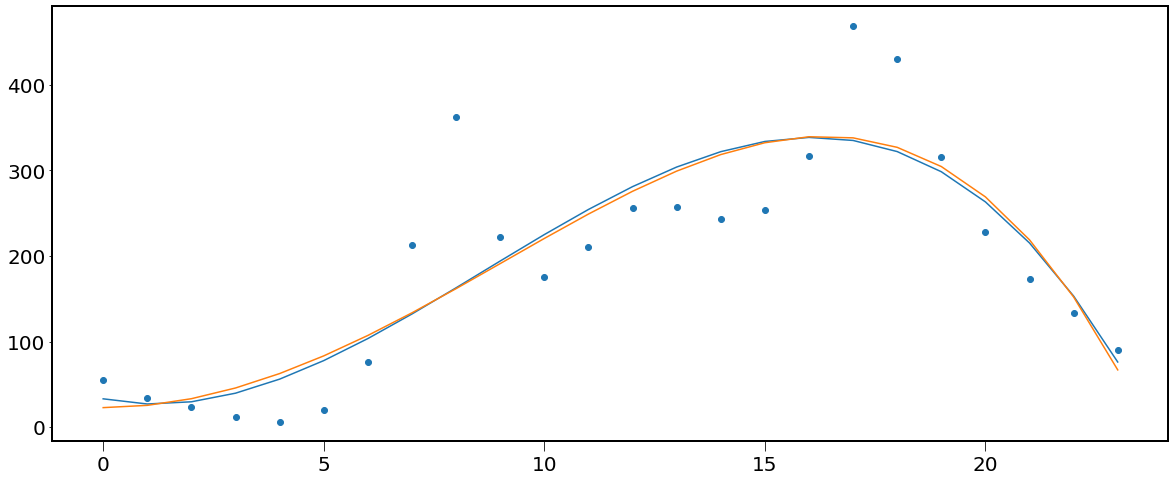

In [221]:
plt.scatter(X,y, )
plt.plot(X,y_pred_est, )
plt.plot(X, y_lasso,)

# temperature

In [255]:
X = bikes[['atemp']]
y = bikes['count']

In [256]:
my_pipe = Pipeline([
    ['my_poly_engineering', PolynomialFeatures(degree=4)],
    ['my_lasso', Lasso(max_iter=5000)]
])

In [257]:
my_pipe.fit(X, y)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.470e+08, tolerance: 3.572e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Pipeline(steps=[('my_poly_engineering', PolynomialFeatures(degree=4)),
                ['my_lasso', Lasso(max_iter=5000)]])

In [258]:
parameter_grid = {
    'my_poly_engineering__degree': [1,2,3,4,5],
    'my_lasso__alpha': [0.001, 0.01, 0.1 ]
}

In [259]:
gridsearch = GridSearchCV(my_pipe, 
                          parameter_grid, 
                          scoring=None,
                          verbose=2)

In [260]:
gridsearch.fit(X,y)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=1; total time=   0.1s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.1s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.1s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=2; total time=   0.0s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.385e+08, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e+08, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.208e+08, tolerance: 3.153e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.024e+08, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.644e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=3; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+08, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=4; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+08, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=4; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e+08, tolerance: 3.153e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=4; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+08, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=4; total time=   0.5s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.792e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=4; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+08, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=5; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.222e+08, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=5; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+08, tolerance: 3.153e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=5; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+08, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=5; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.781e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.001, my_poly_engineering__degree=5; total time=   0.4s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=1; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s
[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=2; total time=   0.0s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.227e+08, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.665e+07, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.292e+05, tolerance: 3.153e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.6s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.255e+07, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.367e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=3; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.404e+08, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=4; total time=   3.8s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.224e+08, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=4; total time=   1.2s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.347e+08, tolerance: 3.153e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=4; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.036e+08, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=4; total time=   1.2s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.792e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=4; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+08, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   2.7s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.222e+08, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+08, tolerance: 3.153e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+08, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.5s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.781e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END my_lasso__alpha=0.01, my_poly_engineering__degree=5; total time=   0.4s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=1; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=1; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=1; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=1; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=1; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=2; total time=   0.0s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.461e+07, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=3; total time=   1.0s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.926e+07, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=3; total time=   0.3s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=3; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.031e+07, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=3; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.610e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=3; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.403e+08, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=4; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.223e+08, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=4; total time=   0.5s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.346e+08, tolerance: 3.153e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=4; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.034e+08, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=4; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.783e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=4; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.402e+08, tolerance: 3.120e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=5; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.222e+08, tolerance: 3.081e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=5; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.345e+08, tolerance: 3.153e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=5; total time=   0.3s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.035e+08, tolerance: 2.406e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=5; total time=   0.4s
[CV] END .my_lasso__alpha=0.1, my_poly_engineering__degree=5; total time=   0.4s


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.782e+07, tolerance: 2.412e+04
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


GridSearchCV(estimator=Pipeline(steps=[('my_poly_engineering',
                                        PolynomialFeatures(degree=4)),
                                       ['my_lasso', Lasso(max_iter=5000)]]),
             param_grid={'my_lasso__alpha': [0.001, 0.01, 0.1],
                         'my_poly_engineering__degree': [1, 2, 3, 4, 5]},
             verbose=2)

In [261]:
gridsearch.best_params_

{'my_lasso__alpha': 0.001, 'my_poly_engineering__degree': 1}

In [262]:
gridsearch.best_estimator_.score(X,y)

0.1519319070361851

In [263]:
y_pred_est = gridsearch.best_estimator_.predict(X)
y_pred_est

array([114.42260987, 108.09057698, 108.09057698, ..., 127.04501753,
       139.66742519, 133.33539231])

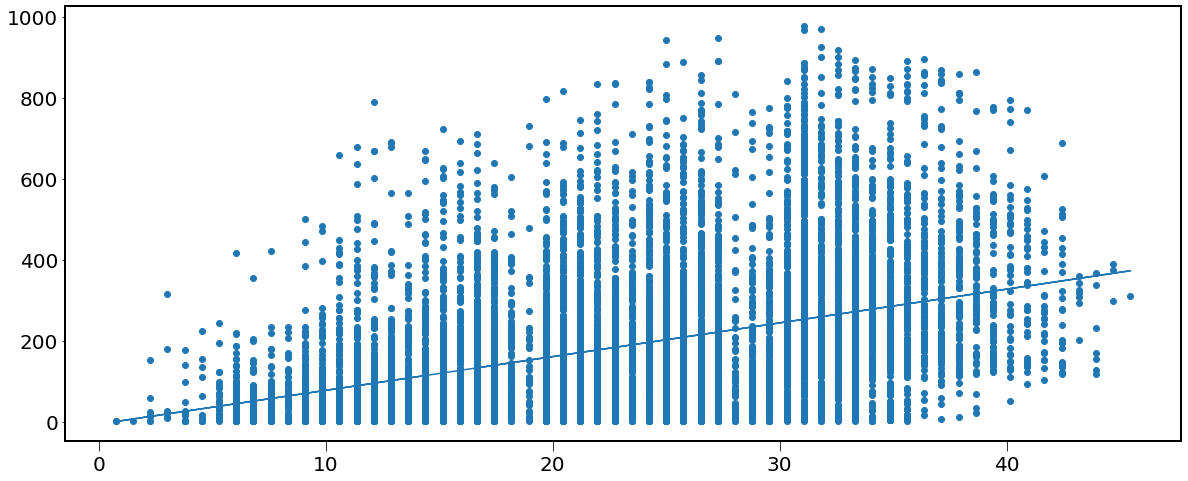

In [264]:
plt.scatter(X,y, )
plt.plot(X,y_pred_est, )

### Result

- for the hour we use a polynomial of 4 degree!

In [ ]:
pt.get_feature_names()

In [ ]:
pt.fit(X[['X']])

In [ ]:
parameter_grid = {
    'my_poly_engineering__degree' : [1,2,3,4,5], 
    'my_lasso__alpha' : [0.001, 0.01, 0.1 ,1, 10]  # strength of regularization
}

In [ ]:
gridsearch = GridSearchCV(my_pipe,    # estimator is the pipeline
                          parameter_grid, 
                          scoring= 'neg_mean_squared_error',  
                          verbose = 4) 

In [ ]:
gridsearch.fit(X,y)

In [ ]:
gridsearch.best_params_

In [ ]:
gridsearch.best_estimator_.score(X,y)

In [ ]:
y_pred = gridsearch.best_estimator_.predict(X)

In [ ]:
plt.scatter(X,y)
plt.plot(X,y_pred)

$\color{red}{\text{Result - months}}$
- Polynomial 2
-alpha 0.001

In [ ]:
d_years_months = bikes.resample('m').mean()
d_years_months.head()

In [ ]:
sns.boxplot(x='month',y='count',data=d_years,hue='month')

- $\color{red}{\text{Days}}$

In [ ]:
d_days = bikes.resample('d').mean()
d_days#.head()

In [ ]:
d_days.dropna(how='all',inplace=True)
d_days.isna().sum()

In [ ]:
sns.boxplot(x='day',y='count',data=d_days,hue='day')

In [ ]:
df1 = d_days.loc['2011-01',['count','day']]
df1.head()

In [ ]:
sns.scatterplot(x = df1['day'], y = df1['count'])

In [ ]:
# assing X,y values
y = df1['count']
X = df1[['day']]


- - $\color{green}{\text{Fit a Linear Regression model to the days vs count}}$

In [ ]:
from sklearn.linear_model import LinearRegression
m1 = LinearRegression()
m1.fit(X,y)
round(m1.score(X,y),2)
y_pred = m1.predict(X)

df1['y_pred'] = y_pred

sns.scatterplot(data = df1, x = 'day', y = 'count', label = 'count')
sns.lineplot(data = df1, x = 'day', y = 'y_pred', label = 'y pred')
m1.score(X,y)



- - $\color{green}{\text{Now let's try to fix it by adding polynomials}}$

In [ ]:
X['x^2'] = X['day']**2
X.head()


- - - $\color{green}{\text{Let's fit again with both features}}$

In [ ]:
m1.fit(X,y)
y_pred_poly = m1.predict(X)
m1.score(X,y)
df1['y_pred_poly'] = y_pred_poly
sns.scatterplot(x = df1['day'], y = df1['count'], label = 'y')
sns.lineplot(x = df1['day'], y = df1['y_pred_poly'], label = 'y_pred with polynomials' )

In [ ]:
m1.score(X,y)

- - $\color{green}{\text{Now let's try to fix it by adding polynomials from SKLEARN}}$


In [ ]:
from sklearn.preprocessing import PolynomialFeatures


- - - $\color{green}{\text{Let's fit again with both features}}$

In [ ]:
m1 = PolynomialFeatures(degree= 2, include_bias= False,interaction_only=False)
X.columns = ['x','x^2']
pd.DataFrame(m1.fit_transform(X))
pd.get_feature_names()
#m1.fit(X[['x']])
#m1.fit(X,y)
#y_pred_poly = m1.predict(X)
#m1.score(X,y)
#df1['y_pred_poly'] = y_pred_poly
#sns.scatterplot(x = df1['day'], y = df['count'], label = 'y')
#sns.lineplot(x = df1['day'], y = df['y_pred_poly'], label = 'y_pred with polynomials' )

In [ ]:
m1.score(X,y)

$\color{red}{\text{RESULTS}}$
- The first degree polynomial is not strong model but the second degree starts resembling the features. Nevertheless still details are not mentioned.

# 1. END

# 2. Feature Engineering

In [ ]:
bikes['year'] = bikes['year'].replace({2011: 0.0, 2012: 1.0})
bikes.head(2)

# Make the pipeline

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
import pandas as pd
import os
print(os.getcwd())

In [ ]:
#bikes.insert(15, 'casual', bikes.pop('casual'))
#bikes.insert(16, 'registered', bikes.pop('registered'))
#bikes.head(2)

In [ ]:
bikes.drop(['temp',  'holiday', 'registered','casual'],axis=1,inplace=True)

In [ ]:
# split to X, and y
X = df.iloc[:,:10]
y = df['count']

In [ ]:
# feature engineering for numericals
numeric_features = ["windspeed", "humidity","atemp"]

# create a sequential pipeline 
# output of one step will be input to the next 
numeric_transformer_nf = make_pipeline(
    PolynomialFeatures(degree= 2, include_bias= False,interaction_only=True),
    StandardScaler()
    )

In [ ]:
# feature engineering for numericals
categorical_features = ["weather", "workday","season"]

# create a sequential pipeline 
# output of one step will be input to the next 
categorical_transformer_cf = make_pipeline(
    OneHotEncoder(sparse=False, handle_unknown='ignore')
    )

In [ ]:
# feature engineering for numericals
time_features = ["month", "day","hour","week","year"]

# create a sequential pipeline 
# output of one step will be input to the next 
time_transformer_tf = make_pipeline(
    PolynomialFeatures(degree= 3, include_bias= False,interaction_only=True),
    OneHotEncoder(sparse=False, handle_unknown='ignore')
    )

In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer_nf, numeric_features),
        ("cat", categorical_transformer_cf, categorical_features),
        ('time', time_transformer_tf, time_features)
    ],
    remainder='passthrough')

In [ ]:
# create the model pipeline
pipeline = make_pipeline(preprocessor, LogisticRegression(max_iter=300))

# split data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)

####
# fit the pipeline to training data
pipeline.fit(X_train, y_train)
###
# calculate the accuracy score from test data
#print("model score: %.3f" % pipeline.score(X_test, y_test))

# get predictions from the pipeline
#print(pipeline.predict(X_test))

In [ ]:
# plot 
sns.set(style="ticks")
x = bikes.loc['2011-01-01':'2011-12-01'].index
y = bikes.loc['2011-01-01':'2011-12-01','count']
sns.lineplot(x, y)

In [ ]:
test = bikes.loc[bikes['holiday'] == 1].index.date #find a way to see periodicity of behaviour between the holidays
g = np.unique(test)
g

In [ ]:
# plot 
sns.set(style="ticks")
i = 0
x = bikes.loc[g[i]:g[i+1]].index
y = bikes.loc[g[i]:g[i+1],'count']
sns.lineplot(x, y)
i = 1
x = bikes.loc[g[i]:g[i+1]].index
y = bikes.loc[g[i]:g[i+1],'count']
sns.lineplot(x, y)

In [ ]:
bikes.columns

In [ ]:
sns.set(style="ticks")
fig, ax = plt.subplots(4)
fig.tight_layout()
a = '2011-01-01'
b = '2011-02-01'
bX = bikes.loc[a:b].index
g1 = sns.scatterplot(x=bX, y = bikes.loc[a:b,'count'  ],data = bikes.loc[a:b], ax=ax[0])
g2 = sns.barplot(x=bX, y = bikes.loc[a:b,'humidity'   ],data = bikes.loc[a:b], ax=ax[1])
g3 = sns.barplot(x=bX, y = bikes.loc[a:b,'atemp'      ],data = bikes.loc[a:b], ax=ax[2])
g4 = sns.scatterplot(x=bX, y = bikes.loc[a:b,'weather'],data = bikes.loc[a:b], ax=ax[3])

In [ ]:
hmp = bikes[['season', 'weather', 'temp','atemp','humidity','windspeed']].copy()
plt.figure(figsize=(15,10))
sns.heatmap(hmp.corr(),annot = True,cbar = False)
sns.set(font_scale=5)

In [ ]:
# gives the degree of correlation
c = bikes.corr()
s = c.unstack()
so = s.sort_values(kind="quicksort")
so

In [ ]:
bikes.drop(['test','count'],axis=1,inplace=True)
bikes.head(2)

# Modeling with Linear Regression

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, KBinsDiscretizer, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score  
from sklearn.metrics import plot_roc_curve, auc, roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_recall_curve

rand_st = 42

%matplotlib inline

In [ ]:
# For EDA you may want to split the original dataframe, and assign X and y 
bikes_train, bikes_validation = train_test_split(bikes, test_size=0.3, random_state= rand_st)

In [ ]:
# I also checked extra features like Class and Age but it did not give better result in the end so i reduced the features.

X_train_R = bikes_train
y_train_R = bikes_train['registered']
X_validation_R = bikes_validation
y_validation_R = bikes_validation['registered']

In [ ]:
# I also checked extra features like Class and Age but it did not give better result in the end so i reduced the features.

X_train_C = bikes_train
y_train_C = bikes_train['casual']
X_validation_C = bikes_validation
y_validation_C = bikes_validation['casual']
X_train_C.drop(['registered','casual'],axis=1,inplace=True)
X_validation_C.drop(['registered','casual'],axis=1,inplace=True)

In [ ]:
# initiate the model
from sklearn.linear_model import LinearRegression
LR_R = LinearRegression()

In [ ]:
# what i want to plot
# determine the period
a = '2011-01-01'
b = '2011-01-02'
y_R = y_train_C.loc[a:b]
X_R = X_train_C.loc[a:b]


In [ ]:
LR_R.fit(X_R,y_R)

In [ ]:
LR_R.coef_, LR_R.intercept_


In [ ]:
LR_R.score(X_R,y_R)

In [ ]:
y_R_pred = LR_R.predict(X_R)

In [ ]:
X_R.columns

In [ ]:
sns.set(style="ticks")
bX = X_R.loc[a:b].index
sns.scatterplot(x=bX, y = X_R.loc[a:b,'holiday'],data = X_R.loc[a:b])
sns.lineplot(x=bX, y= y_R_pred,data = X_R.loc[a:b])